In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [16]:
def Conv2D(image, filters, stride, padding):
    h, w, c = image.shape
    n_of_filters, f, f = filters.shape
    output_images = []
    for i in range(n_of_filters):
        if padding == 'same':
            new_h = h // stride
            new_w = w // stride
            output_image = np.zeros((new_h, new_w))
        else:
            new_h = h - f + 1
            new_w = w - f + 1
            output_image = np.zeros((new_h, new_w))
        for j in range(c):
            if padding == 'same':
                p = (f - 1) // 2
                padded_image = np.pad(image[:,:,j], ((p, p), (p, p)), mode='constant')
            else:
                p = 0
                padded_image = image[:,:,j]
            for k in range(0, new_h, stride):
                for l in range(0, new_w, stride):
                    roi = padded_image[k:k+f, l:l+f]
                    output_image[k, l] += np.sum(roi * filters[i:,:,])

        output_images.append(output_image)

    subplot_count = len(output_images) + 1
    plt.subplot(subplot_count, 1, 1)
    plt.imshow(image)
    for i in range(1, subplot_count):
        plt.subplot(subplot_count, 1, i + 1)
        plt.imshow(output_images[i - 1])
    return output_images

In [17]:
def max_pooling():
    pass

In [18]:
#filters
bottom_sobel =    [[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]]
               
top_sobel =     [[1, 2, 1],
                 [0, 0, 0],
                 [-1,-2,-1]]

sharpening = [[0,-1,0],
              [-1,5,-1],
              [0,-1,0]]

weighted_averaging_3_3 = (1/16)*np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])

robert_x = [[1, 0],
            [0, -1]]    

robert_y = [[0, +1],
            [-1, 0]] 

averaging_2x2 = (1/4)*np.array([[1, 1],
                       [1, 1]])

gaussian_5x5 = (1/273)*np.array([[1,4,7,4,1],
                        [4,16,26,16,4],
                        [7,26,41,26,7],
                        [4,16,26,16,4],
                        [1,4,7,4,1]])

averaging_5x5 = (1/25)*np.ones((5, 5))

first_layer_filters = [bottom_sobel, top_sobel, sharpening, weighted_averaging_3_3]
second_layer_filters = [robert_x, robert_y, averaging_2x2]
third_layer_filters = [gaussian_5x5, averaging_5x5]


(352, 352, 3)
(352, 352)
(352, 352)


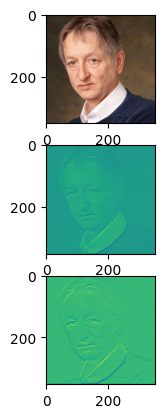

In [22]:
image = cv2.imread('Sample Inputs/images/hinton.jpg')
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
out1 = Conv2D(image, np.array([sharpening, bottom_sobel]), 1, 'same')
# out2 = Conv2D(image, np.array([top_sobel]), 1, 'same')

In [10]:
original_image = cv2.imread('Sample Inputs/images/goodfellow.png')
cv2.imshow('original image',original_image)
cv2.waitKey(0)
# create a sharpening kernel
sharpen_filter=np.array([[-1,-1,-1],
                 [-1,9,-1],
                [-1,-1,-1]])
# applying kernels to the input image to get the sharpened image
sharp_image=cv2.filter2D(original_image,-1,sharpen_filter)
cv2.imshow('Required image',sharp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()